In [64]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [65]:
boston = load_boston()

## View Metadata & General Information

In [66]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Generate Dataframe

In [67]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [68]:
df['Target'] = boston['target']

In [69]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


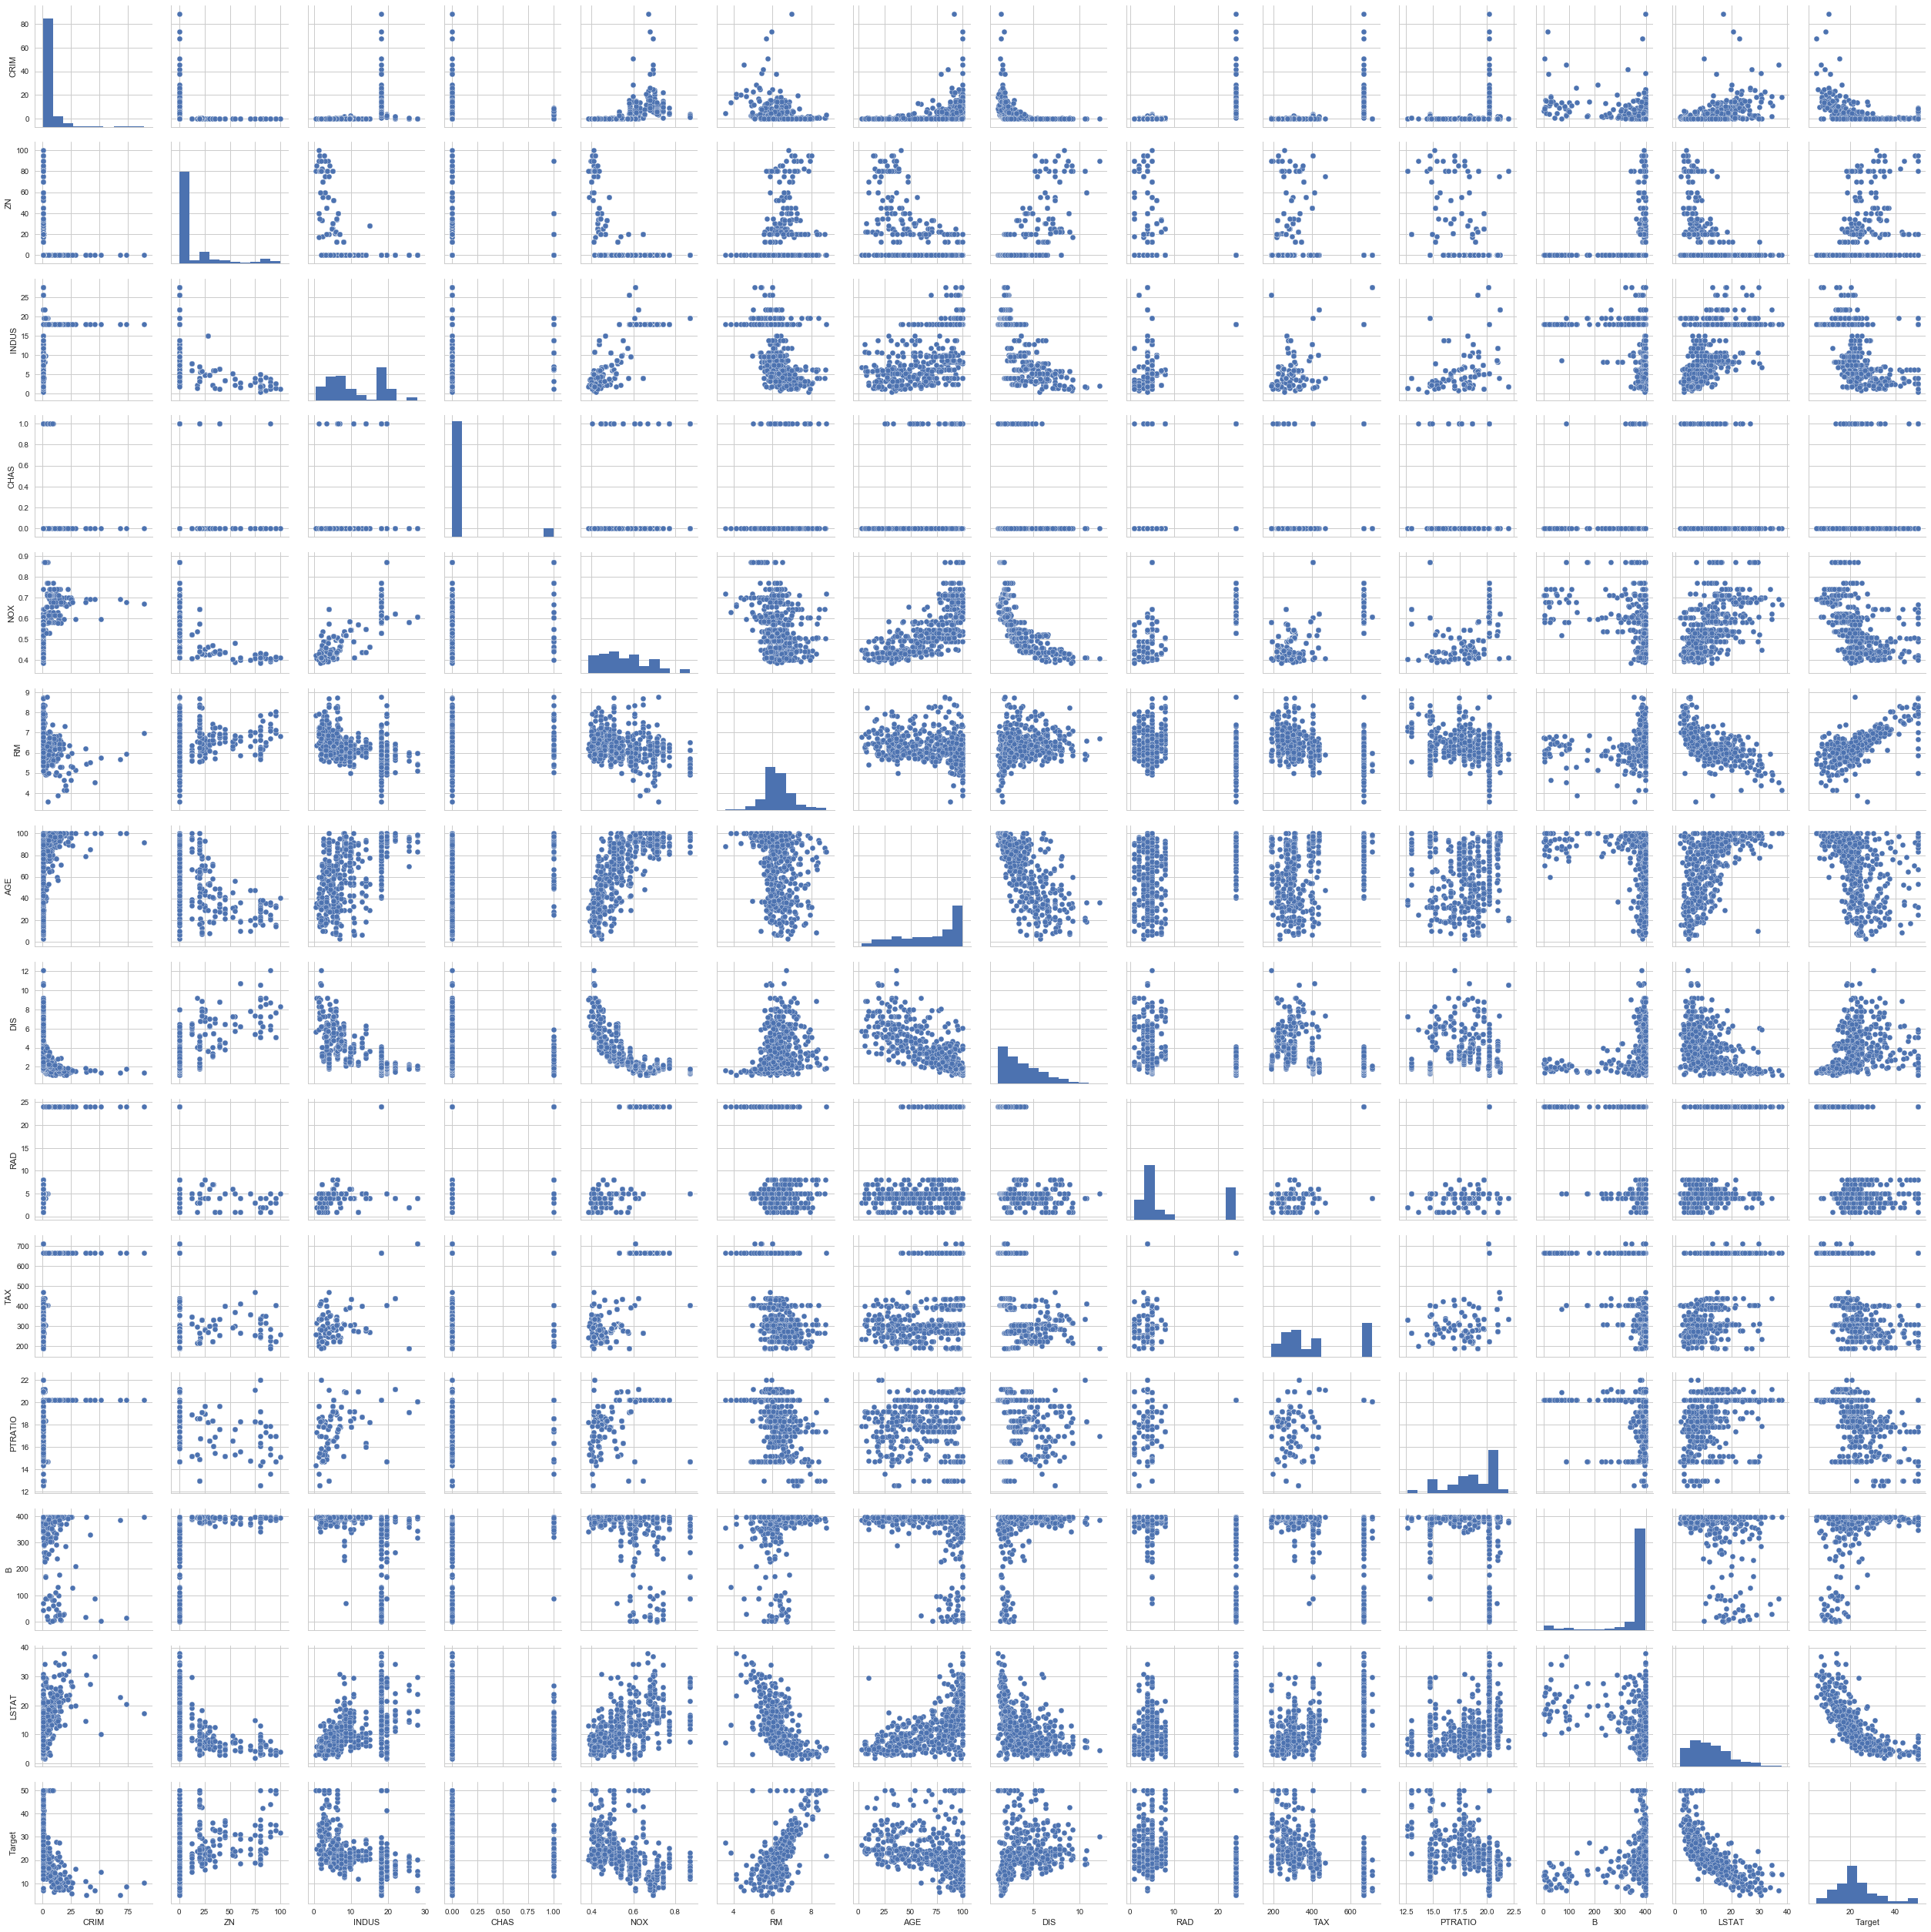

In [70]:
sns.pairplot(df);

## Generate Linear Regression Model

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [72]:
X = df.drop('Target',axis=1)

In [73]:
y = df.Target

In [74]:
LR = LinearRegression()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
predictions = LR.predict(X_test)

## Evaluate Model

### Plot predictions and actual y values

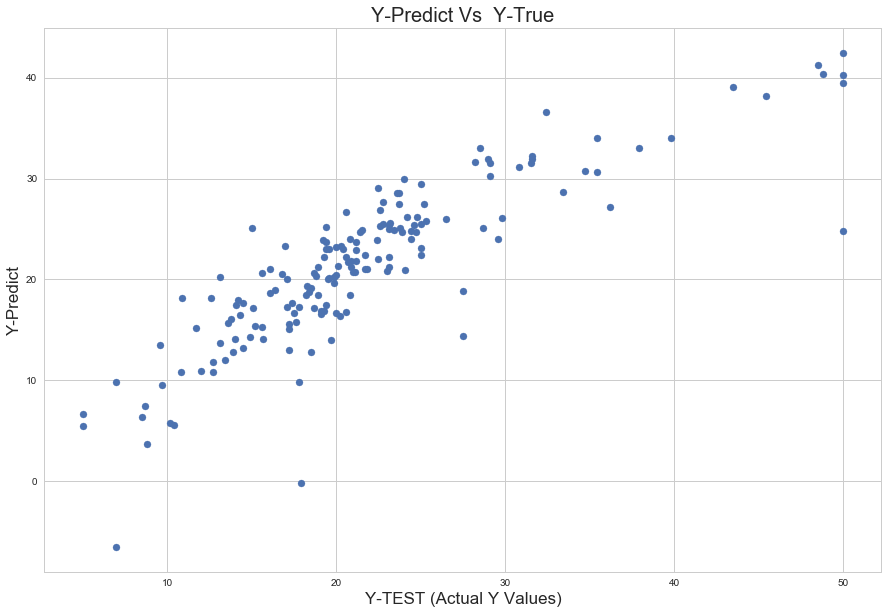

In [78]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.scatter(y_test,predictions);
plt.xlabel("Y-TEST (Actual Y Values)", fontsize='17')
plt.ylabel("Y-Predict", fontsize='17');
plt.title("Y-Predict Vs  Y-True", fontsize='20');

## Plot the Residuals  Distribution 

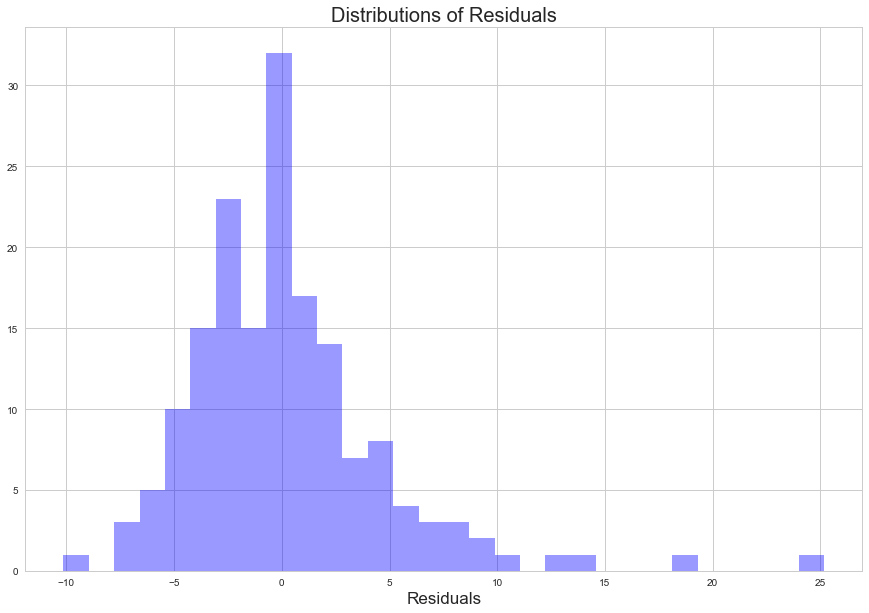

In [79]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.distplot([y_test- predictions],bins=30 ,kde=False,color='blue')
plt.xlabel('Residuals',fontsize='17');
plt.title("Distributions of Residuals", fontsize='20');

## Used Metrics to Evaluate Linear Regression Model

In [80]:
from sklearn import metrics

In [82]:
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:", metrics.mean_squared_error(y_test,predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print ("R2:", metrics.explained_variance_score(y_test,predictions)) #explains the variance

MAE: 3.151287836588429
MSE: 20.747143360309206
RMSE: 4.5549032218378915
R2: 0.7264142415850796


## Generate Dataframe To Explain How Each Feature Will Impact Target

In [83]:
df_explain = pd.DataFrame(LR.coef_,X.columns,columns=['coeff'])
df_explain

,coeff
CRIM,-0.128060
ZN,0.037796
INDUS,0.058611
CHAS,3.240070
NOX,-16.222268
RM,3.893522
AGE,-0.012788
DIS,-1.423269
RAD,0.234513
TAX,-0.008203
